Plot saved successfully to /dataHDD/chsaikeerthi/2024-chirumamilla/results1/violin_plot_20240815_141328.pdf


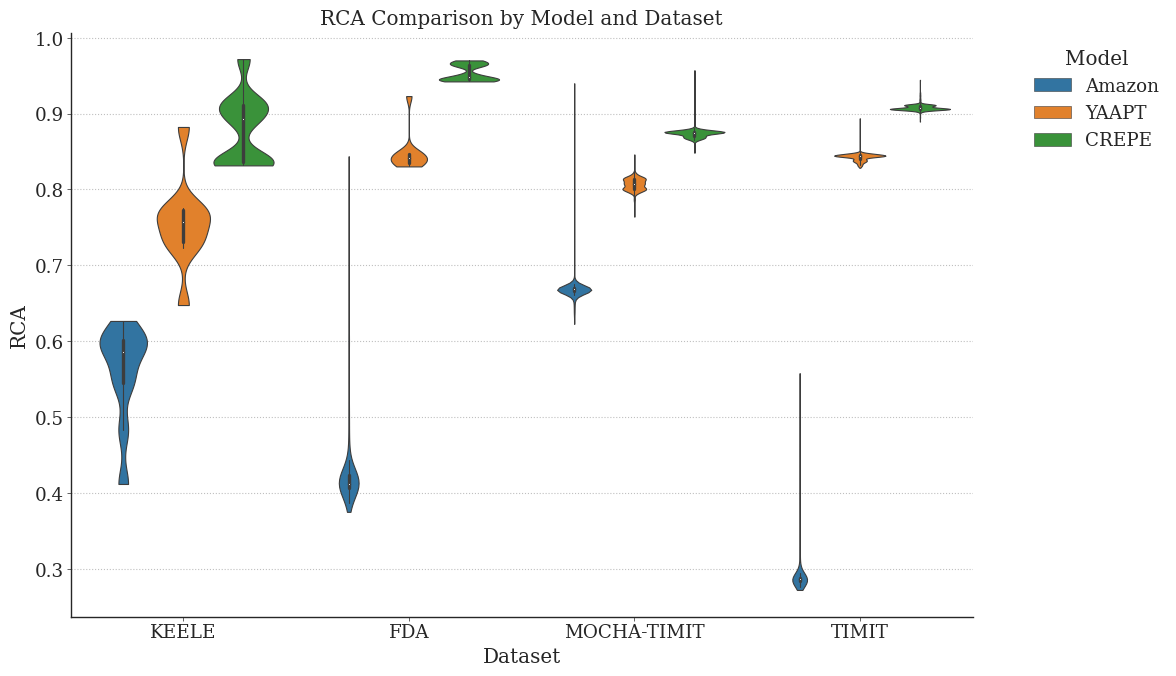

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import datetime
from egaznepy.visualize import apply_plot_style
apply_plot_style(1.5)
plt.rcParams['text.usetex'] = False
# Read CSV files for Xcorr model
df_amazon_timit = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_amazon_timit.csv', header=None, names=['RCA'])
df_amazon_mocha_timit = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_amazon_mocha_timit.csv', header=None, names=['RCA'])
df_amazon_fda = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_amazon_fda.csv', header=None, names=['RCA'])
df_amazon_keele = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_amazon_keele.csv', header=None, names=['RCA'])

# Read CSV files for IF model
df_yaapt_keele = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_yaapt_keele.csv', header=None, names=['RCA'])
df_yaapt_fda = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_yaapt_fda.csv', header=None, names=['RCA'])
df_yaaot_mocha_timit = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_yaapt_mocha_timit.csv', header=None, names=['RCA'])
df_yaapt_timit = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_yaapt_timit.csv', header=None, names=['RCA'])

# Read CSV files for Xcorr model without LPC
df_crepe_keele = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_crepe_keele.csv', header=None, names=['RCA'])
df_crepe_fda = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_crepe_fda.csv', header=None, names=['RCA'])
df_crepe_mocha_timit = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_crepe_mocha_timit.csv', header=None, names=['RCA'])
df_crepe_timit = pd.read_csv('/dataHDD/chsaikeerthi/2024-chirumamilla/results/rca_per_utt_crepe_timit.csv', header=None, names=['RCA'])

# Add model and dataset labels
df_amazon_keele['Model'] = 'Amazon'
df_amazon_keele['Dataset'] = 'KEELE'
df_amazon_fda['Model'] = 'Amazon'
df_amazon_fda['Dataset'] = 'FDA'
df_amazon_mocha_timit['Model'] = 'Amazon'
df_amazon_mocha_timit['Dataset'] = 'MOCHA-TIMIT'
df_amazon_timit['Model'] = 'Amazon'
df_amazon_timit['Dataset'] = 'TIMIT'

df_yaapt_keele['Model'] = 'YAAPT'
df_yaapt_keele['Dataset'] = 'KEELE'
df_yaapt_fda['Model'] = 'YAAPT'
df_yaapt_fda['Dataset'] = 'FDA'
df_yaaot_mocha_timit['Model'] = 'YAAPT'
df_yaaot_mocha_timit['Dataset'] = 'MOCHA-TIMIT'
df_yaapt_timit['Model'] = 'YAAPT'
df_yaapt_timit['Dataset'] = 'TIMIT'

df_crepe_keele['Model'] = 'CREPE'
df_crepe_keele['Dataset'] = 'KEELE'
df_crepe_fda['Model'] = 'CREPE'
df_crepe_fda['Dataset'] = 'FDA'
df_crepe_mocha_timit['Model'] = 'CREPE'
df_crepe_mocha_timit['Dataset'] = 'MOCHA-TIMIT'
df_crepe_timit['Model'] = 'CREPE'
df_crepe_timit['Dataset'] = 'TIMIT'



# Combine all data
df = pd.concat([
    df_amazon_keele,df_amazon_fda,df_amazon_mocha_timit,df_amazon_timit,
    df_yaapt_keele,df_yaapt_fda,df_yaaot_mocha_timit,df_yaapt_timit,
    df_crepe_keele,df_crepe_fda,df_crepe_mocha_timit,df_crepe_timit
])

# Plotting
plt.figure(figsize=(12, 7))

# Create violin plots
sns.violinplot(data=df, x='Dataset', y='RCA', hue='Model', cut=0,  bw=0.3)

# Add title and labels
plt.title('RCA Comparison by Model and Dataset')
plt.xlabel('Dataset')
plt.ylabel('RCA')
plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')

# Save the plot
now = datetime.datetime.now()
results_dir = '/dataHDD/chsaikeerthi/2024-chirumamilla/results1'
if not os.path.exists(results_dir):
    os.makedirs(results_dir)

#plt.savefig(f'{results_dir}/violin_plot_comparison_{now.strftime("%Y-%m-%d_%H-%M-%S")}.pdf', bbox_inches='tight')

filename = f'{results_dir}/violin_plot_{datetime.datetime.now().strftime("%Y%m%d_%H%M%S")}.pdf'
try:
    plt.savefig(filename, format='pdf', bbox_inches='tight', dpi=800)
    print(f'Plot saved successfully to {filename}')
except Exception as e:
    print(f'Error saving plot: {e}')
plt.show()
